<a href="https://colab.research.google.com/github/ReyesGus/ExtraccionConocimientosBD-/blob/main/Actividad2.2/Actividad2%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 2.2: Preparación de los datos

De Jesus Cabrera Carlos Armando

Reyes Romero Gustavo

Rodriguez Velazco Eliazar


Este conjunto de datos tiene datos de clientes que compran ropa en línea. La tienda ofrece sesiones de consejos de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y ordenar en una aplicación móvil o sitio web la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en su experiencia con la aplicación móvil o en su sitio web.

# Importar librerias


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(np.__version__)
print(pd.__version__)

1.19.5
1.1.5


# Ver datos

In [16]:
datos = pd.read_csv('ecommerce_customers.csv',delimiter=',',header='infer')

datos

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [11]:
!wget https://raw.github.com/ReyesGus/ExtraccionConocimientosBD-/main/Actividad2.2/ecommerce_customers.csv
df_customers = pd.read_csv('ecommerce_customers.csv',delimiter=',',header='infer')

--2021-10-10 21:47:19--  https://raw.github.com/ReyesGus/ExtraccionConocimientosBD-/main/Actividad2.2/ecommerce_customers.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ReyesGus/ExtraccionConocimientosBD-/main/Actividad2.2/ecommerce_customers.csv [following]
--2021-10-10 21:47:19--  https://raw.githubusercontent.com/ReyesGus/ExtraccionConocimientosBD-/main/Actividad2.2/ecommerce_customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71638 (70K) [text/plain]
Saving to: ‘ecommerce_customers.csv.2’

ecommerce_custo

#Limpieza de datos

In [17]:
#Obtener la suma de los valores perdidos por cada columna
datos_perdidos = df_customers.isnull().sum()
datos_perdidos

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         1
Length of Membership    1
Yearly Amount Spent     0
dtype: int64

In [18]:
#Visualizar los datos faltantes del dataframe
df_customers[df_customers.isnull().any(axis=1)]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
10,andrew06@peterson.com,"26104 Alexander Groves\nAlexandriaport, WY 282...",Tomato,33.992573,13.338975,37.225806,NaN,492.606013
38,cunninghamwilliam@hotmail.com,"4589 Dan Fords\nBeasleyburgh, ME 96590-8272",HoneyDew,32.749368,9.954976,NaN,4.650491,478.170334


In [19]:
#Conocer el porcentaje de datos faltantes
total_celdas = np.product(df_customers.shape)
total_celdas_perdidas = datos_perdidos.sum()
porcentaje = (total_celdas_perdidas / total_celdas) * 100
porcentaje

0.05

#Imputación de los datos


Consisten en estimar los valores ausentes en base a los valores válidos de otras variables y/o casos de la muestra. La estimación se puede hacer a partir de la información del conjunto completo de variables o bien de algunas variables especialmente seleccionadas

In [20]:
#Verificacion del tipo de dato por columna
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  499 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [21]:
#Sustitución por la media a valores faltantes de la columna Length of Membership
media_length_membership = df_customers['Length of Membership'].mean()
media_length_membership

3.5355674753386777

In [22]:
df_customers['Length of Membership'].replace(np.NaN, media_length_membership, inplace=True)
df_customers.loc[10]

Email                                               andrew06@peterson.com
Address                 26104 Alexander Groves\nAlexandriaport, WY 282...
Avatar                                                             Tomato
Avg. Session Length                                               33.9926
Time on App                                                        13.339
Time on Website                                                   37.2258
Length of Membership                                              3.53557
Yearly Amount Spent                                               492.606
Name: 10, dtype: object

In [23]:
#Sustitución por la media a valores faltantes de la columna Length of Membership
media_timeweb = df_customers['Time on Website'].mean()

In [24]:
df_customers.replace(np.NaN, media_timeweb, inplace=True)
df_customers.loc[38]

Email                                 cunninghamwilliam@hotmail.com
Address                 4589 Dan Fords\nBeasleyburgh, ME 96590-8272
Avatar                                                     HoneyDew
Avg. Session Length                                         32.7494
Time on App                                                 9.95498
Time on Website                                             37.0598
Length of Membership                                        4.65049
Yearly Amount Spent                                          478.17
Name: 38, dtype: object

In [25]:
#Verificación del cambio
df_customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [26]:
#Verificar el tipo de datos por cada columna
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Visualizar los datos

> ## **Datos estadísticos**

In [27]:
df_customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.059788,3.535567,499.314038
std,0.992563,0.994216,1.010382,0.998167,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.934588,445.038277
50%,33.082008,11.983231,37.065856,3.535328,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [28]:
#Metodo para obtener el histograma y un boxplot
def distribucion(datos_columna):

    # Obtener estadísticas
    min_val = datos_columna.min()
    max_val = datos_columna.max()
    mean_val = datos_columna.mean()
    med_val = datos_columna.median()

    print('Minimo:{:.2f}\nMedia:{:.2f}\nMediana:{:.2f}\nMaximo:{:.2f}\n'.format(min_val,
                                                                                mean_val,
                                                                                med_val,
                                                                                max_val))

    # Crear una figura para 2 subtramas (1 fila, 2 columnas)
    fig, ax = plt.subplots(1, 2, figsize = (20,5))

    # Trazar el histograma   
    ax[0].hist(datos_columna)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid()

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 3)
    ax[0].axvline(x=mean_val, color = 'green', linestyle='dashed', linewidth = 3)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 3)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 3)

    # Traza el boxplot   
    ax[1].boxplot(datos_columna, vert=False)
    ax[1].set_xlabel('Valor')

    # Agregar un título a la figura
    fig.suptitle('Data Distribution')

    # Mostrar la figura
    fig.show()

Minimo:8.51
Media:12.05
Mediana:11.98
Maximo:15.13



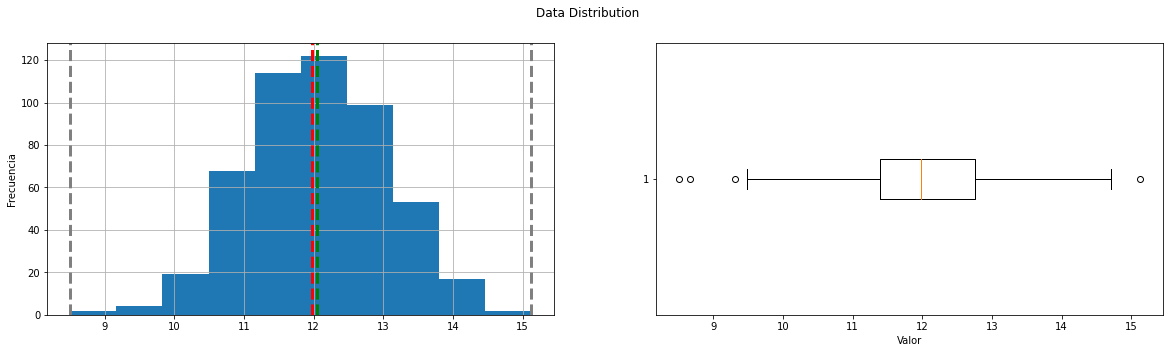

In [29]:
#Time on App
# Obtener la variable para examinar
col = df_customers['Time on App']
# Llamar a la función
distribucion(col)

Minimo:33.91
Media:37.06
Mediana:37.07
Maximo:40.01



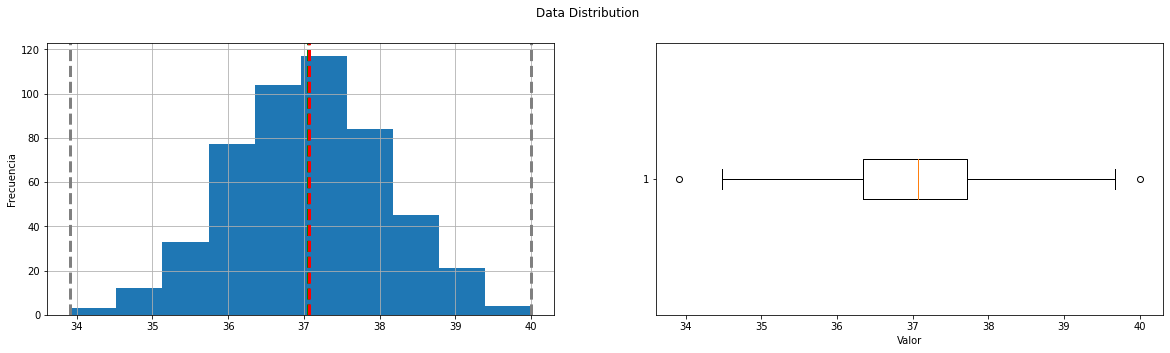

In [30]:
#Time on Website
# Obtener la variable para examinar
col = df_customers['Time on Website']
# Llamar a la función
distribucion(col)